# Cisco - Ariel University API Security Detection Challenge 2023

## Student ID: 207276775
GitHub project: https://github.com/RazElbaz/API_security_challenge

The site that helped me find algorithms:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

### Imports and global settings

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 1 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,Directory Traversal,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,NaN,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,Cookie Injection,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,NaN,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,LOG4J,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN


## Data organization, data conversion and cleaning unnecessary data

In [2]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,LOG4J,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=wKm-iDQeCXGjwXGrGJvfzWzs5VYbnWSP75B6BjFz1...,"Mon, 21 Nov 2022 18:39:51 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,/cookielogin,0,username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc...,Cookie Injection,Malware
4278,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=oyXTP1KfNdMwWb_jIYEQYKzE9RZALsuCGCtJtUlju...,"Mon, 21 Nov 2022 18:39:51 GMT",GET,http://127.0.0.1:5000/orders/get/id/7668,,404 NOT FOUND,application/json,36,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4279,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=bfYOeMnpxlFA9F7ObPemhCXYmeYNbBteewfAWbnfy...,"Mon, 21 Nov 2022 18:39:52 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIw

In [3]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",None,None,None,None,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,None,None,None,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,LOG4J,Malware


In [4]:
# removing columns with the same values
print("Before: " ,df.shape)
for col in df.columns:
    if len(df[col].unique()) == 1:
        # print("col drop: ",col)
        df = df.drop(col,axis=1)

print("After: " ,df.shape)

Before:  (4282, 26)
After:  (4282, 21)


In [5]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   request.headers.User-Agent       4282 non-null   object
 1   request.headers.Accept-Encoding  4282 non-null   object
 2   request.headers.Accept-Language  4282 non-null   object
 3   request.headers.Sec-Fetch-Site   4282 non-null   object
 4   request.headers.Sec-Fetch-Mode   4282 non-null   object
 5   request.headers.Sec-Fetch-Dest   4282 non-null   object
 6   request.headers.Set-Cookie       4282 non-null   object
 7   request.headers.Date             4282 non-null   object
 8   request.method                   4282 non-null   object
 9   request.url                      4282 non-null   object
 10  response.status                  4282 non-null   object
 11  response.headers.Content-Type    4282 non-null   object
 12  response.headers.Content-Length  4

In [6]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                'request.method',
                'request.headers.Accept-Language',
                'response.headers.Content-Type',
                'request.headers.Sec-Fetch-Site',
                'request.headers.Sec-Fetch-Mode',
                'response.status',
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                    'request.headers.Set-Cookie',
                    'request.url',
                   'response.body',
                    'response.headers.Location',
                    'request.headers.Content-Length',
                    'request.headers.Cookie',
                    'response.headers.Set-Cookie'
                    ]

COLUMNS_TO_REMOVE = ['request.headers.Date',
                     'request.headers.Sec-Fetch-Dest',
                    'request.headers.Accept-Encoding']

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
        
        
    # The unique() function is used to find the unique elements of an array. Returns the sorted unique elements of an array
    df['response.headers.Content-Type'].unique().tolist()
    # Convert argument to a numeric type
    df['response.headers.Content-Length'] = pd.to_numeric(df['response.headers.Content-Length'])
    return df

df = vectorize_df(df)
df.head()

,request.headers.User-Agent,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,-0.632456,1,0,0,-0.786334,0,0.000000,0,0,72,200,0.000000,-1.000000,-1.0,-1.0,-1.0,Directory Traversal,Malware
1,-0.632456,0,0,0,-0.786146,0,0.000000,4,0,41,404,0.000000,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
2,-0.800000,0,0,0,-0.751646,0,1.000000,0,1,105,200,0.436436,-0.408248,-1.0,-1.0,-1.0,Cookie Injection,Malware
3,-0.516398,1,0,0,-0.716002,0,0.894427,4,0,30,404,0.577350,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
4,0.377964,0,0,0,-0.691095,0,0.000000,4,0,41,404,0.000000,-1.000000,-1.0,-1.0,-1.0,LOG4J,Malware


In [7]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.User-Agent', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'request.headers.Cookie', 'response.headers.Location', 'request.headers.Content-Length', 'response.headers.Set-Cookie']


request.headers.User-Agent         float64
request.headers.Accept-Language      int32
request.headers.Sec-Fetch-Site       int32
request.headers.Sec-Fetch-Mode       int32
request.headers.Set-Cookie         float64
request.method                       int32
request.url                        float64
response.status                      int32
response.headers.Content-Type        int32
response.headers.Content-Length      int64
response.status_code                 int64
response.body                      float64
request.headers.Cookie             float64
response.headers.Location          float64
request.headers.Content-Length     float64
response.headers.Set-Cookie        float64
attack_type                         object
label                               object
dtype: object

## Train test split

In [8]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(3526, 16) (3526,)
(756, 16) (756,)


Counter({'Malware': 2264, 'Benign': 2018})

## Model choosing and fitting

## Result printout

In [9]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

### Model 1- RandomForestClassifier()

[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.88462   0.96910   0.92493       356
     Malware    0.96995   0.88750   0.92689       400

    accuracy                        0.92593       756
   macro avg    0.92728   0.92830   0.92591       756
weighted avg    0.92976   0.92593   0.92597       756



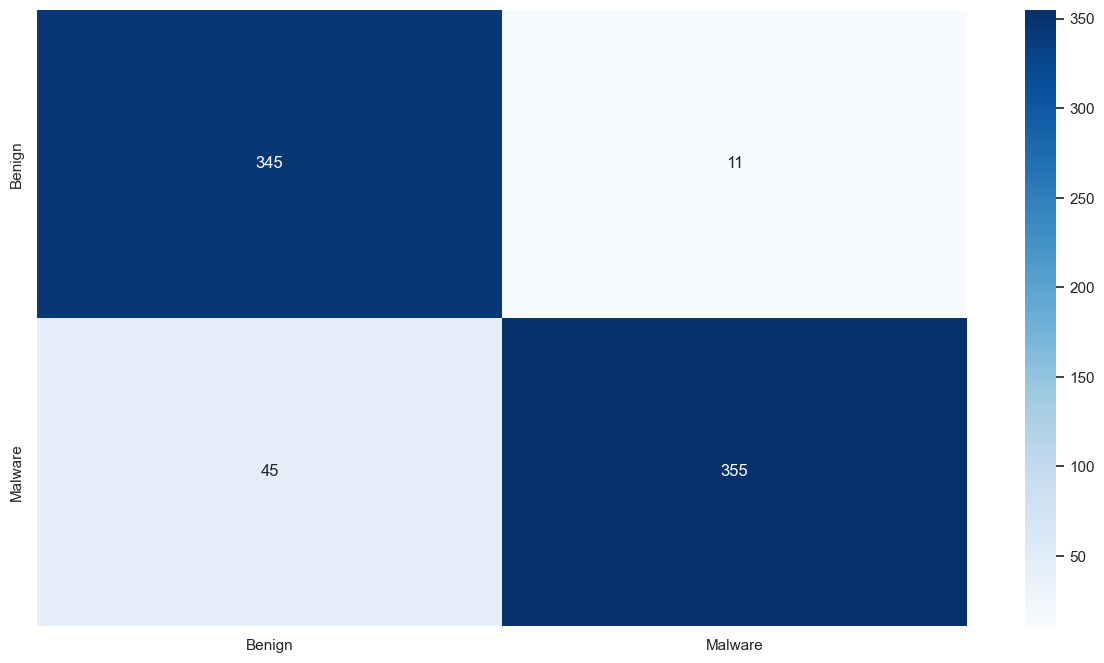

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier()

parameters = {"n_estimators": [250,275,300,325,350,400]}

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
clf = GridSearchCV(clf, parameters)
# Train Model
clf.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
clf = clf.best_estimator_
ResultPrintout(clf)

              precision    recall  f1-score   support

      Benign    0.88432   0.96629   0.92349       356
     Malware    0.96730   0.88750   0.92568       400

    accuracy                        0.92460       756
   macro avg    0.92581   0.92690   0.92459       756
weighted avg    0.92823   0.92460   0.92465       756



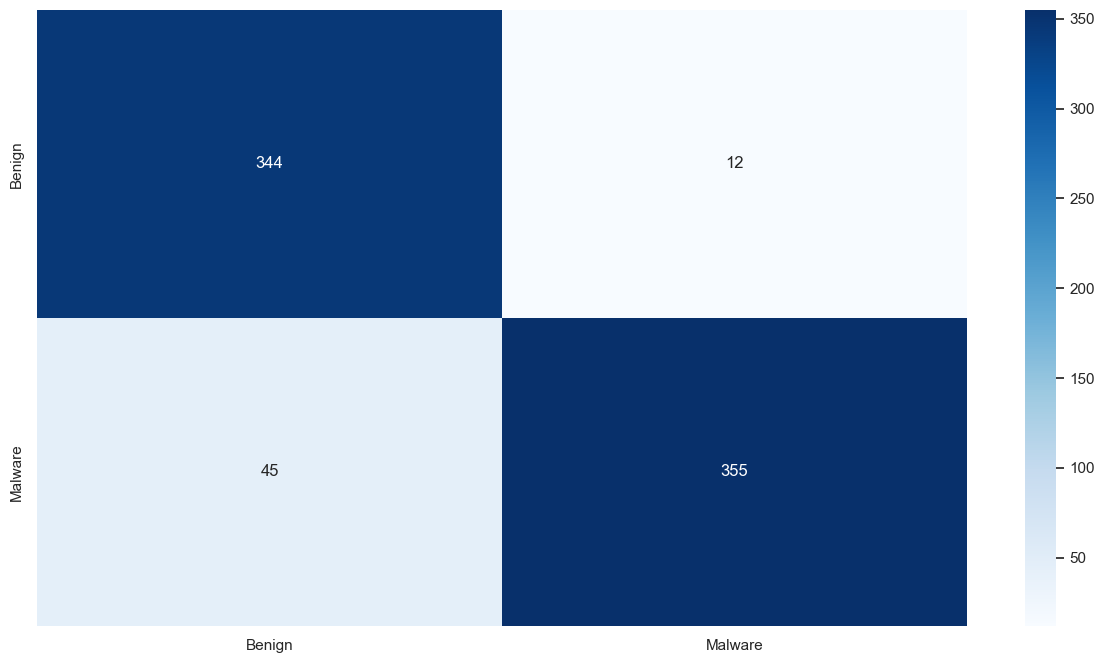

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# We choose our model of choice and set it's hyper parameters you can change anything
clf2 = RandomForestClassifier()


# Train Model
clf2.fit(X_train, y_train)


ResultPrintout(clf2)

### Model 2- DecisionTreeClassifier()

[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.89791   0.96348   0.92954       356
     Malware    0.96524   0.90250   0.93282       400

    accuracy                        0.93122       756
   macro avg    0.93157   0.93299   0.93118       756
weighted avg    0.93353   0.93122   0.93127       756



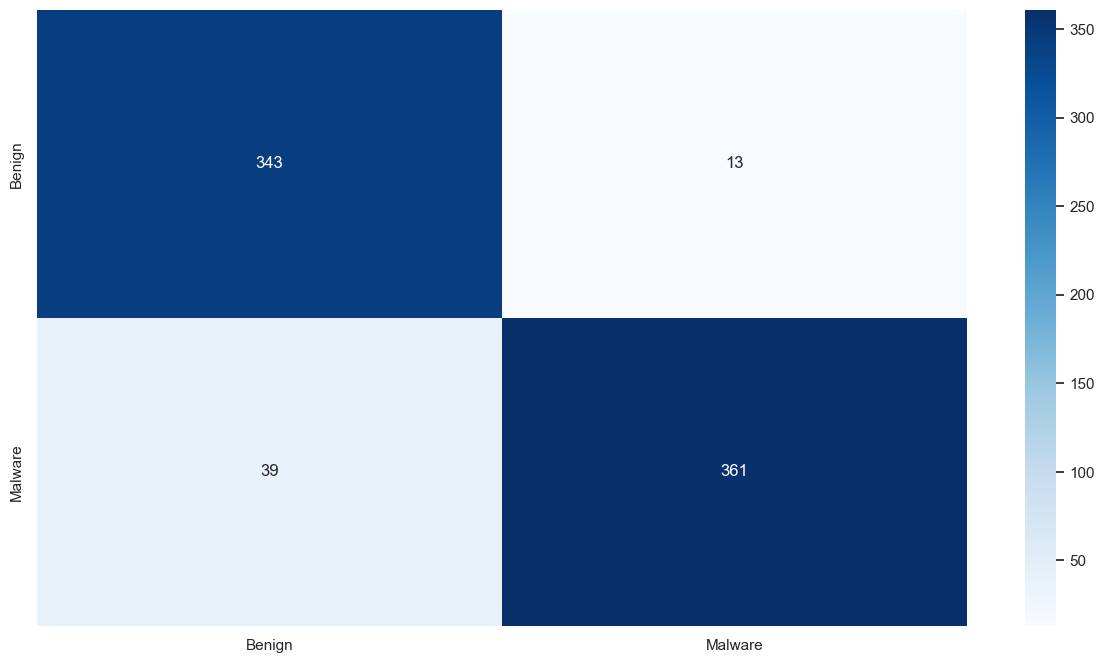

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# We choose our model of choice and set it's hyper parameters you can change anything
dtc = DecisionTreeClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = {
    "min_samples_split": [25,50,75,100,200],
              "splitter":["best", "random"],
             "max_depth":[10,15,20,25,30,50]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
dtc = GridSearchCV(dtc, parameters)
# Train Model
dtc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
dtc = dtc.best_estimator_
ResultPrintout(dtc)

### Model 3- GradientBoostingClassifier()

[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.89295   0.96067   0.92558       356
     Malware    0.96247   0.89750   0.92885       400

    accuracy                        0.92725       756
   macro avg    0.92771   0.92909   0.92721       756
weighted avg    0.92973   0.92725   0.92731       756



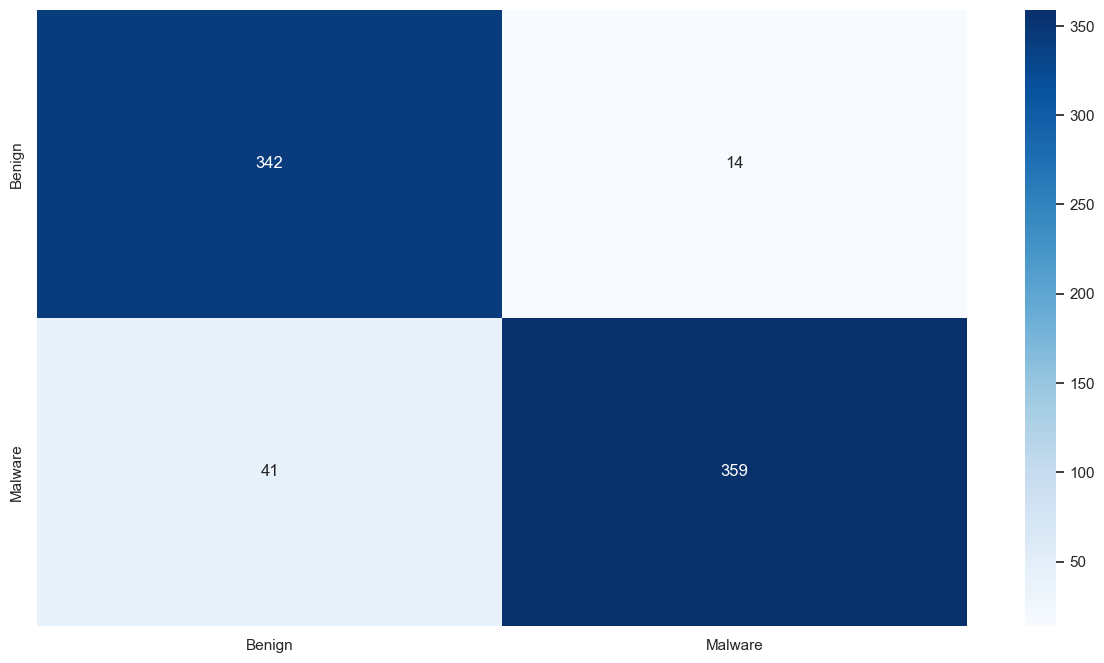

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier
# We choose our model of choice and set it's hyper parameters you can change anything
gbc = GradientBoostingClassifier()

parameters = {"n_estimators": [200,210,215,220,230,240,245,250],
             "min_samples_leaf":[10,15,20,25,30,50]}

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
gbc = GridSearchCV(gbc, parameters)
# Train Model
gbc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
gbc = gbc.best_estimator_
ResultPrintout(gbc)


              precision    recall  f1-score   support

      Benign    0.89351   0.96629   0.92848       356
     Malware    0.96765   0.89750   0.93126       400

    accuracy                        0.92989       756
   macro avg    0.93058   0.93190   0.92987       756
weighted avg    0.93274   0.92989   0.92995       756



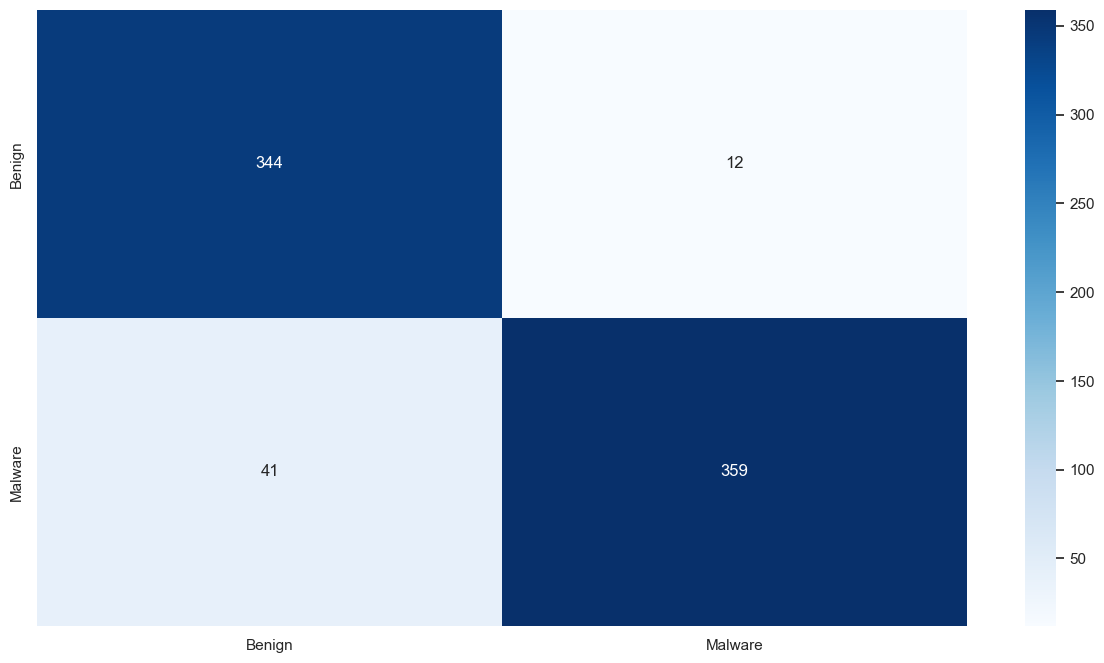

In [14]:

# We choose our model of choice and set it's hyper parameters you can change anything
gbc2 = GradientBoostingClassifier()


# Train Model
gbc2.fit(X_train, y_train)


ResultPrintout(gbc2)


### Model 4- AdaBoostClassifier()

[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.89840   0.94382   0.92055       356
     Malware    0.94764   0.90500   0.92583       400

    accuracy                        0.92328       756
   macro avg    0.92302   0.92441   0.92319       756
weighted avg    0.92445   0.92328   0.92334       756



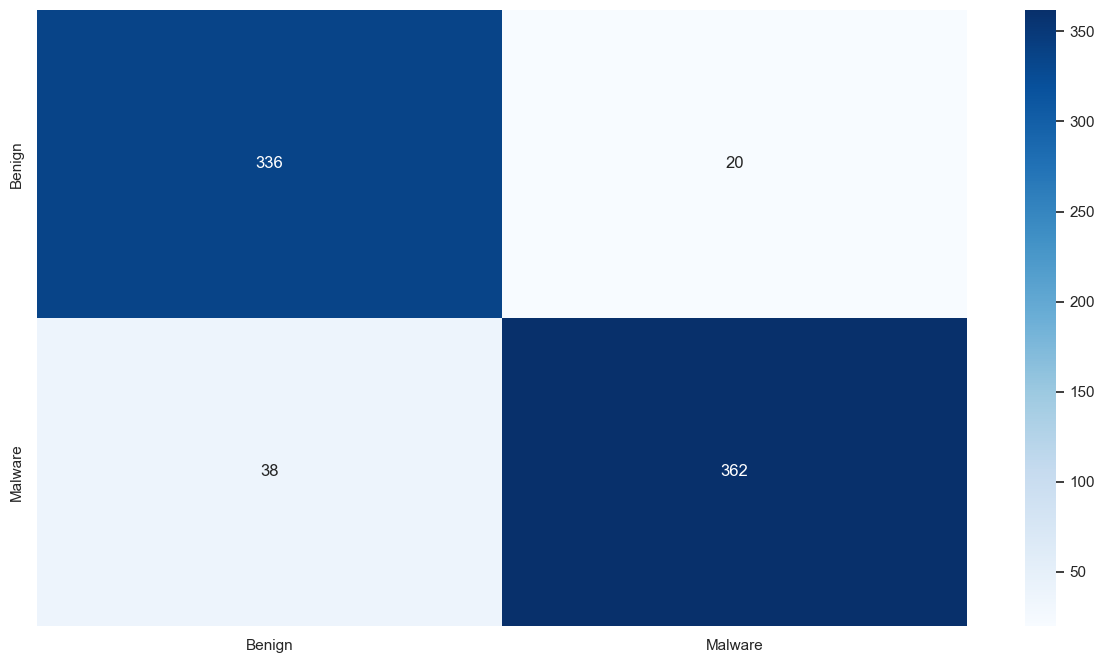

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
# We choose our model of choice and set it's hyper parameters you can change anything
abc = AdaBoostClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = {"random_state": [None,10,20,30,40,50,100,200,300],
              "n_estimators": [25,50,100,200,300,400]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
abc = GridSearchCV(abc, parameters)
# Train Model
abc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
abc = abc.best_estimator_
ResultPrintout(abc)

### Model 5- ExtraTreesClassifier() 

[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.90191   0.92978   0.91563       356
     Malware    0.93573   0.91000   0.92269       400

    accuracy                        0.91931       756
   macro avg    0.91882   0.91989   0.91916       756
weighted avg    0.91980   0.91931   0.91936       756



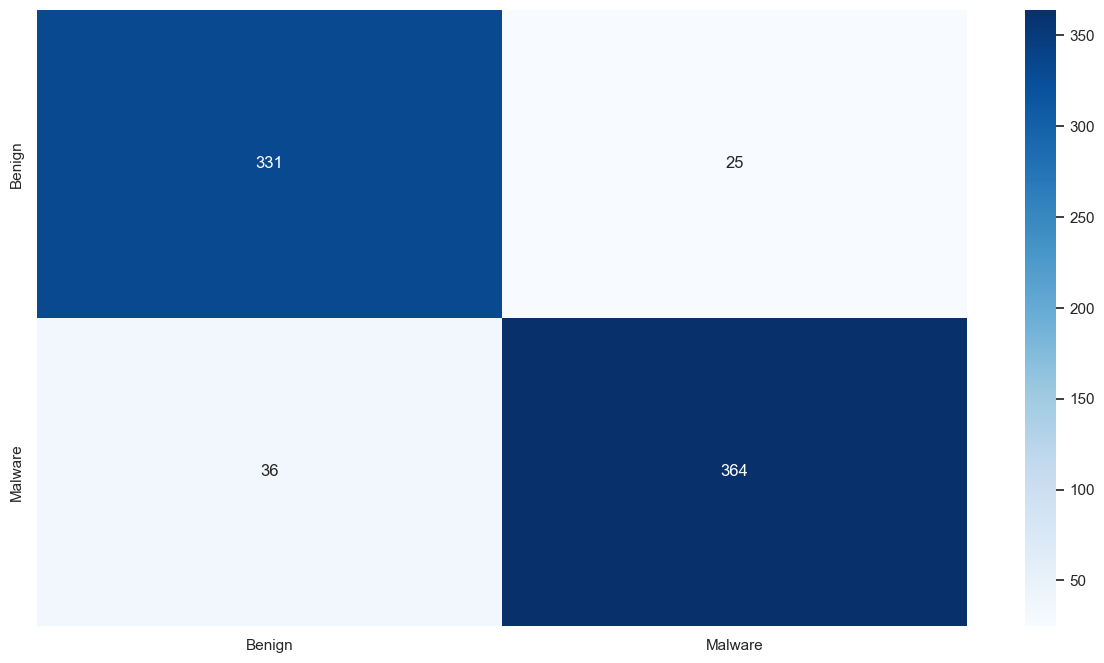

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
from sklearn.ensemble import ExtraTreesClassifier
#n_estimatorsint, default=100: The number of base estimators in the ensemble.
# We choose our model of choice and set it's hyper parameters you can change anything
etc = ExtraTreesClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = { "n_estimators": [10,20,30,40,50,100,200,300,400],
              "min_samples_split":[25,50,75,100,200]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
etc = GridSearchCV(etc, parameters)
# Train Model
etc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
etc = etc.best_estimator_
ResultPrintout(etc)

### Model 6- HistGradientBoostingClassifier() 

[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.88889   0.96629   0.92598       356
     Malware    0.96748   0.89250   0.92848       400

    accuracy                        0.92725       756
   macro avg    0.92818   0.92940   0.92723       756
weighted avg    0.93047   0.92725   0.92730       756



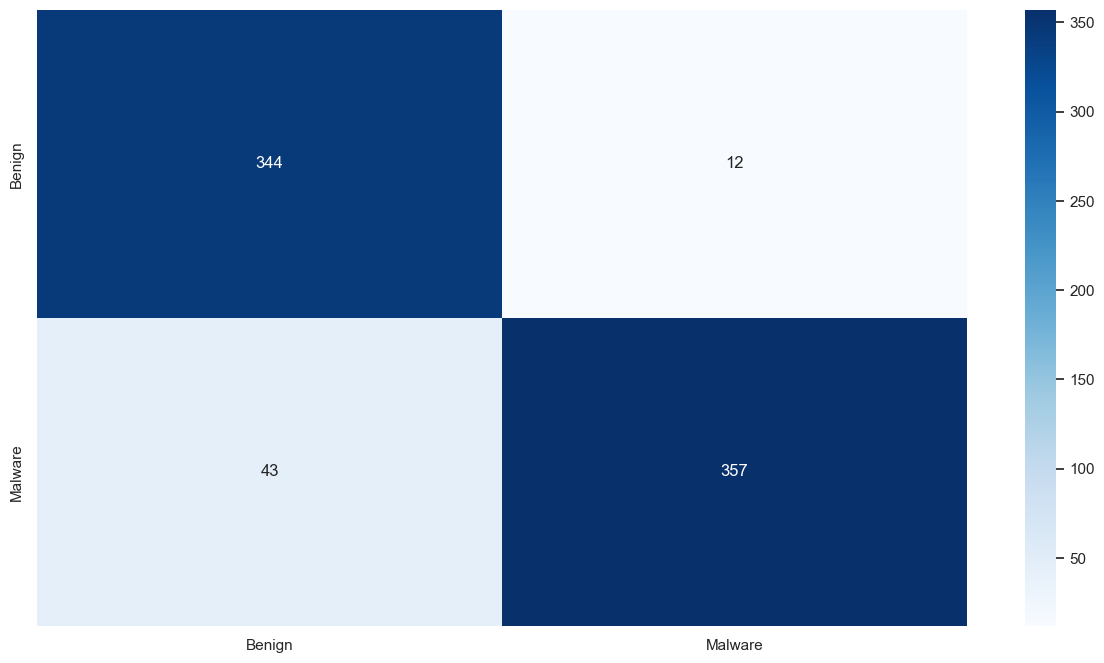

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import HistGradientBoostingClassifier
# We choose our model of choice and set it's hyper parameters you can change anything
hgbc = HistGradientBoostingClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = {"min_samples_leaf": [1,5,10,15,20],
              "max_iter":[20,50,100,200]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
hgbc = GridSearchCV(hgbc, parameters)
# Train Model
hgbc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
hgbc = hgbc.best_estimator_
ResultPrintout(hgbc)

[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.88860   0.96348   0.92453       356
     Malware    0.96486   0.89250   0.92727       400

    accuracy                        0.92593       756
   macro avg    0.92673   0.92799   0.92590       756
weighted avg    0.92895   0.92593   0.92598       756



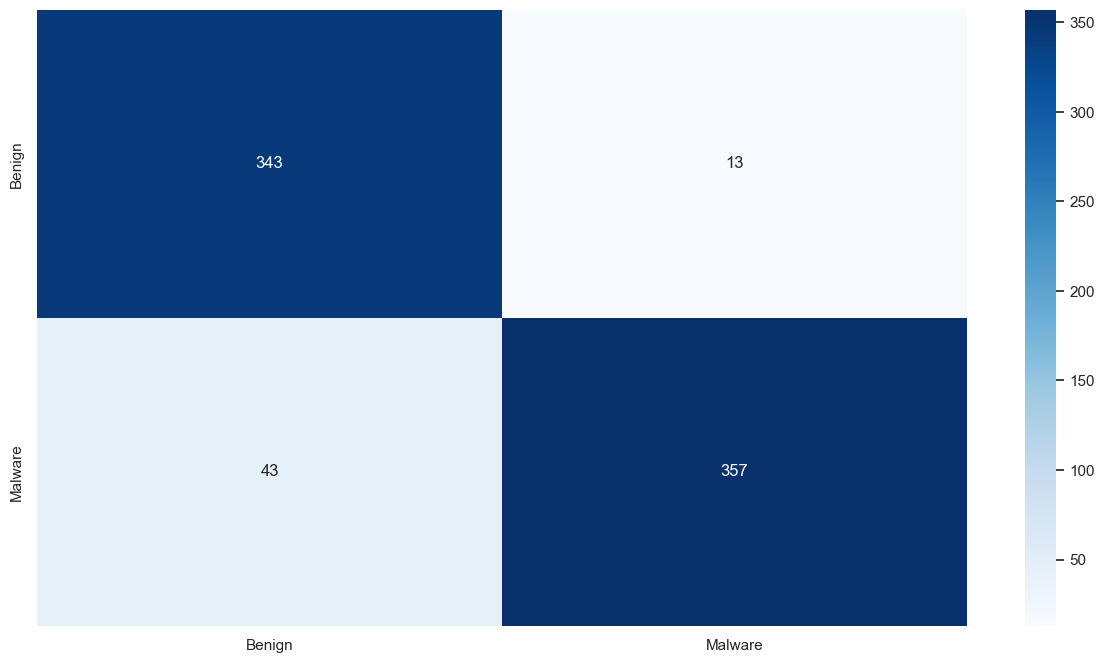

In [18]:
hgbc2 = HistGradientBoostingClassifier()


# Train Model
hgbc2.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))

ResultPrintout(hgbc2)

AdaBoostClassifier(random_state=42)
[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.90083   0.91854   0.90960       356
     Malware    0.92621   0.91000   0.91803       400

    accuracy                        0.91402       756
   macro avg    0.91352   0.91427   0.91381       756
weighted avg    0.91426   0.91402   0.91406       756

SVC(class_weight='balanced', random_state=42)
[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.80952   0.04775   0.09019       356
     Malware    0.53878   0.99000   0.69780       400

    accuracy                        0.54630       756
   macro avg    0.67415   0.51888   0.39399       756
weighted avg    0.66627   0.54630   0.41167       756

HistGradientBoostingClassifier(random_state=42)
[('Benign', 1662), ('Malware', 1864)]
              precision    recall  f1-score   support

      Benign    0.88860   0.96348   0.92453    

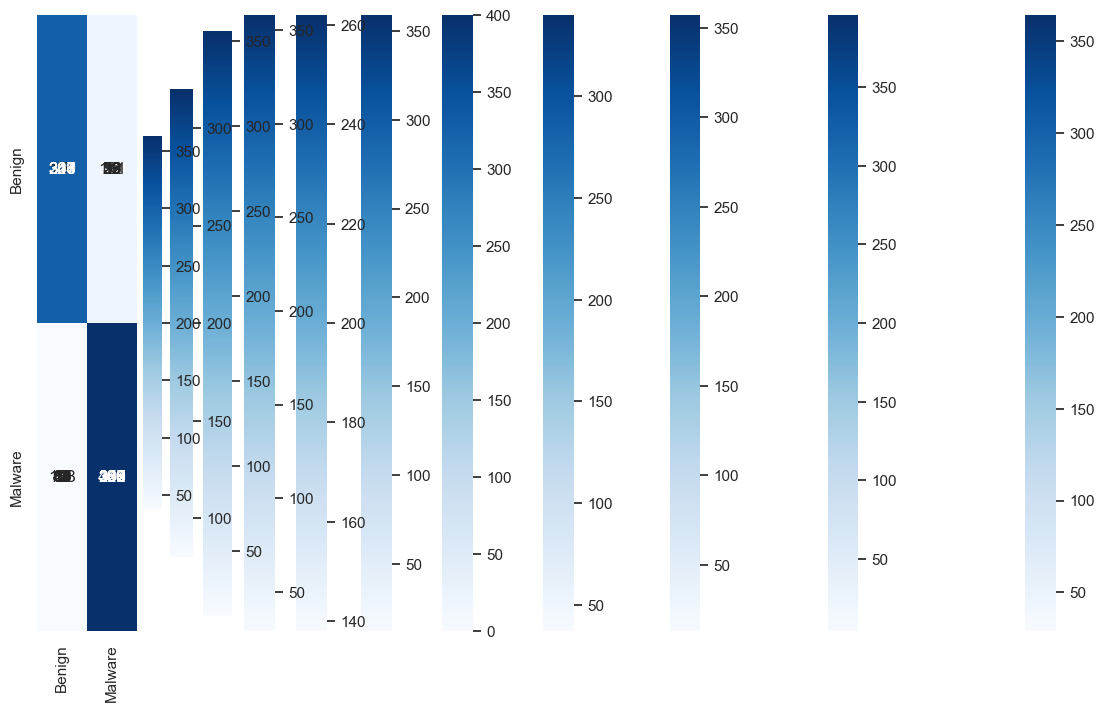

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline


Logistic_Regression =  LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

Decision_Tree =DecisionTreeClassifier(random_state=42, class_weight='balanced')

Random_Forest =  RandomForestClassifier(random_state=42, class_weight='balanced')

Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')

Gradient_Boosting =  GradientBoostingClassifier(random_state=42)

Hist_Gradient_Boosting =  HistGradientBoostingClassifier(random_state=42)

AdaBoost = AdaBoostClassifier(random_state=42)

SGD = SGDClassifier(random_state=42, class_weight='balanced')

SVC =SVC(class_weight='balanced', random_state=42)

Nearest_Neighbor = KNeighborsClassifier(100)

Perceptron = Perceptron(random_state=42)

models={Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC,Nearest_Neighbor,Perceptron}

for model in models:
#     %time scores = evaluate_model(model, X, y)
#     results.append(scores)
#     names.append(name)
#     print('* %s Score = %.3f StdDev = (%.3f)' % (name, np.mean(scores), np.std(scores)), '\n')
#     hgbc2 = HistGradientBoostingClassifier()


    # Train Model
    model.fit(X_train, y_train)
    print(model)
    # # Check data balance and variety
    print(sorted(Counter(y_train).items()))

    ResultPrintout(model)





# Nearest_Neighbor = KNeighborsClassifier(3)
# Nearest_Neighbor.fit(X_train, y_train)
# print(Nearest_Neighbor)
#     # # Check data balance and variety
# print(sorted(Counter(y_train).items()))

# ResultPrintout(Nearest_Neighbor)



# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from timeit import timeit

# import warnings
# warnings.filterwarnings('ignore')

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.compose import ColumnTransformer

# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

# from sklearn.compose import make_column_selector as selector
# from sklearn.pipeline import Pipeline


# Logistic_Regression =  LogisticRegression()

# Decision_Tree =DecisionTreeClassifier()

# Random_Forest =  RandomForestClassifier()

# Extra_Trees=  ExtraTreesClassifier()

# Gradient_Boosting =  GradientBoostingClassifier()

# Hist_Gradient_Boosting =  HistGradientBoostingClassifier()

# AdaBoost = AdaBoostClassifier()

# SGD = SGDClassifier()

# SVC =SVC()

# Nearest_Neighbor = KNeighborsClassifier()

# Perceptron = Perceptron()

# models={Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC,Nearest_Neighbor,Perceptron}

# for model in models:
# #     %time scores = evaluate_model(model, X, y)
# #     results.append(scores)
# #     names.append(name)
# #     print('* %s Score = %.3f StdDev = (%.3f)' % (name, np.mean(scores), np.std(scores)), '\n')
# #     hgbc2 = HistGradientBoostingClassifier()


#     # Train Model
#     model.fit(X_train, y_train)
#     print(model)
#     # # Check data balance and variety
#     print(sorted(Counter(y_train).items()))

#     ResultPrintout(model)

# Choosing the best model

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best=0
m=None
models={clf,clf2,dtc,gbc,gbc2,abc,etc,hgbc,hgbc2,model}
for i in models:
    print(i)
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    print(accuracy_score(true_labels, predictions)*100)
    if accuracy_score(true_labels, predictions)*100 > best:
        best=accuracy_score(true_labels, predictions)*100
        m=i
#         print(best)
#         print(m)
        
print("-------")
print(best)
print(m)
    

GradientBoostingClassifier(min_samples_leaf=10, n_estimators=200)
92.72486772486772
RandomForestClassifier(n_estimators=350)
92.5925925925926
ExtraTreesClassifier(min_samples_split=25, n_estimators=400)
91.93121693121694
HistGradientBoostingClassifier(max_iter=50, min_samples_leaf=15)
92.72486772486772
RandomForestClassifier()
92.46031746031747
HistGradientBoostingClassifier()
92.5925925925926
DecisionTreeClassifier(max_depth=10, min_samples_split=75)
93.12169312169311
AdaBoostClassifier(n_estimators=300)
92.32804232804233
DecisionTreeClassifier(class_weight='balanced', random_state=42)
88.09523809523809
GradientBoostingClassifier()
92.98941798941799
-------
93.12169312169311
DecisionTreeClassifier(max_depth=10, min_samples_split=75)


In [21]:
# from sklearn.metrics import plot_roc_curve
# svc_disp = plot_roc_curve(m, X_test, y_test)

# Test

In [22]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
for column in test_df.columns[test_df.isna().any()].tolist():
    #df.drop(column, axis=1, inplace=True)
    test_df[column] = test_df[column].fillna('None')
test_df = vectorize_df(test_df)

# Predict with your model
X = test_df[features_list].to_numpy()
predictions = m.predict(X)
print(m)

DecisionTreeClassifier(max_depth=10, min_samples_split=75)


# Save your predictions

In [23]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')